In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/DatosParabolico.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
Data = pd.read_csv(file)
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [4]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)

In [5]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [6]:
def Interpolate(x, xi, yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x, xi, j)
        
    return Sum

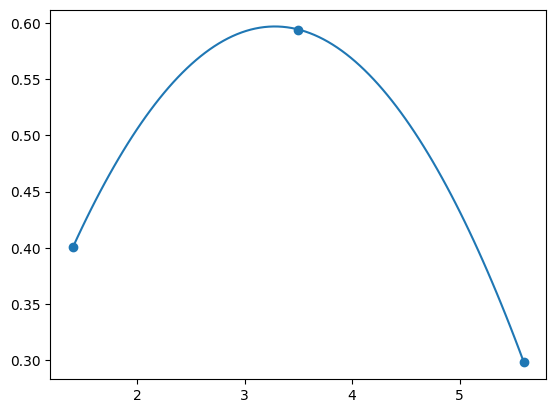

In [7]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)
plt.scatter(X,Y)
plt.plot(x,y)

In [8]:
x = sym.symbols('x', real=True)
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f = sym.expand(f)
f

-0.0554912422401579*x**2 + 0.363970234266202*x

In [9]:
thetar = sym.atan(f.coeff(x))
thetaD =thetar * 180/np.pi
print("angulo (Grados): ")
thetaD

angulo (Grados): 


20.0000000000000

In [10]:
V = (f.coeff(x**2))**(-1)
V *= (-9.8/2)
V = sym.sqrt(V)
V *= 1/sym.cos(thetar)

print("velocidad (m/s): ")
V

velocidad (m/s): 


10.0000000000000